Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [13]:
import pandas as pd
import numpy as np
import itertools
import pprint

# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

pd.__version__

'1.2.4'

Global Variables and Constants

Importing Data

In [3]:
file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)

/Users/farrukhahmed/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [57]:
data_df.postleitzahl = data_df.postleitzahl.astype('Int64')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

data_df["zeit"].dt.year.head()
pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year.head()
#adding variable for age
age =  data_df["zeit"].dt.year - pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year
data_df["age"] = age.astype("Int64")

data_df["age_group"] = pd.cut(data_df.age, bins=[0,12,19,65,130],labels=['children', 'teenager', 'adult','65 over'])
data_df["age_group"].isna().sum()
data_df["age"].isna().sum()


23

In [47]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  19


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'age'],
      dtype='object')

In [19]:
data_df.head()


,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age,age_group
0,11519,2006-04-27 10:49:12,2,8054,Seiersberg,Graz-Umgebung,Steiermark,1,1967,m,False,True,False,False,142.0,89.0,179,111,39,65 over
1,11520,2006-04-27 11:10:46,2,8403,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1,1968,m,False,False,False,False,140.0,70.0,109,80,38,65 over
2,11521,2006-04-27 11:21:09,2,8020,Graz - Gries,Graz(Stadt),Steiermark,1,1973,m,True,False,False,False,130.0,75.0,128,108,33,65 over
3,11522,2006-04-27 11:32:59,1,8044,Graz - Mariatrost,Graz(Stadt),Steiermark,1,1961,m,False,False,False,False,100.0,80.0,130,90,45,65 over
4,11524,2006-04-27 12:01:48,2,8010,Graz - Geidorf,Graz(Stadt),Steiermark,2,1978,f,False,False,False,False,140.0,70.0,144,103,28,65 over


In [10]:
colNames = ['schaetzwert_bp_sys','schaetzwert_by_dia','messwert_bp_sys','messwert_bp_dia']


In [ ]:
## Box Plots w.r.t location

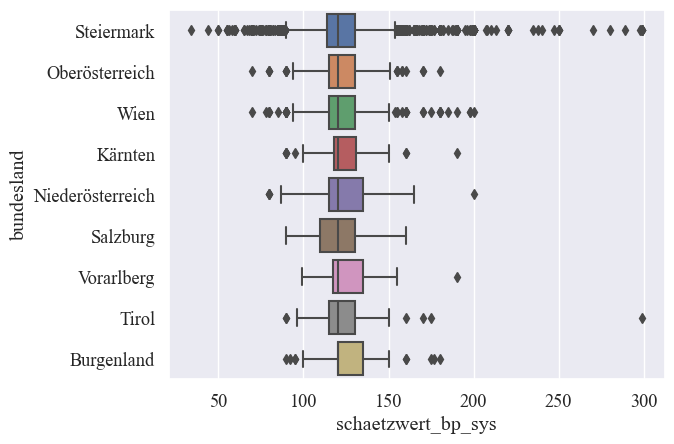

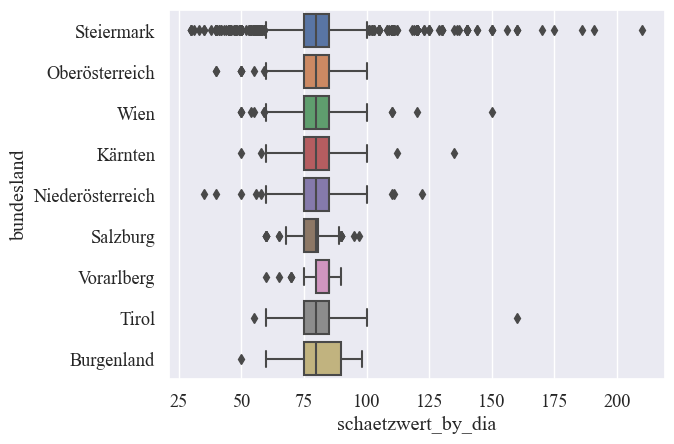

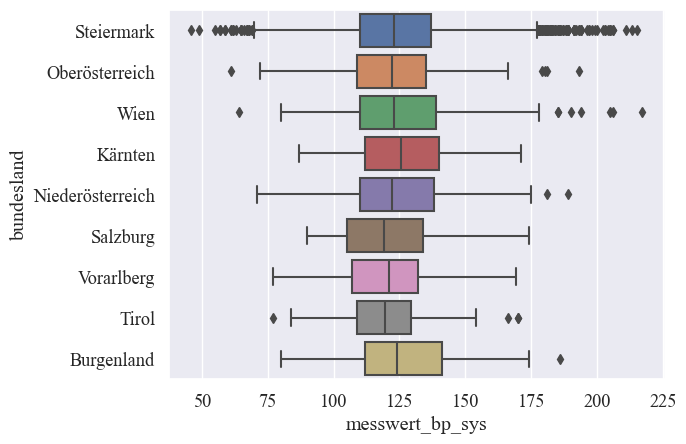

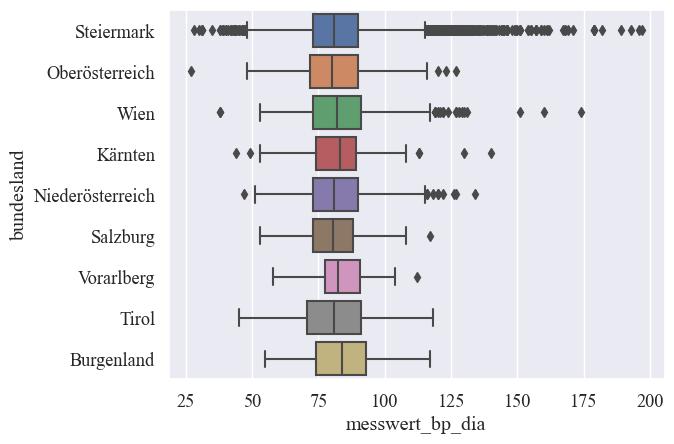

In [13]:

for col in colNames:
    plt.figure()
    sns.boxplot(data=data_df,x=col,y="bundesland")


In [ ]:
## Boxplots w.r.t age

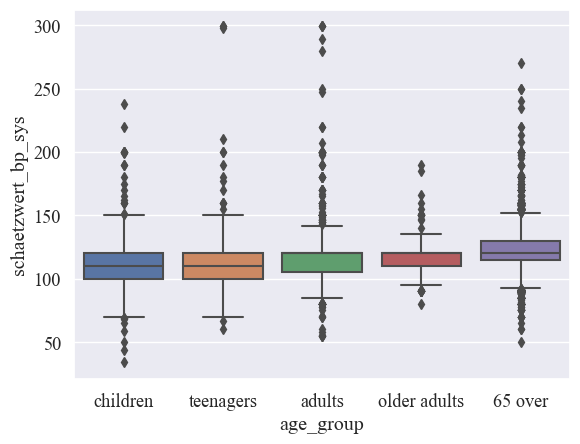

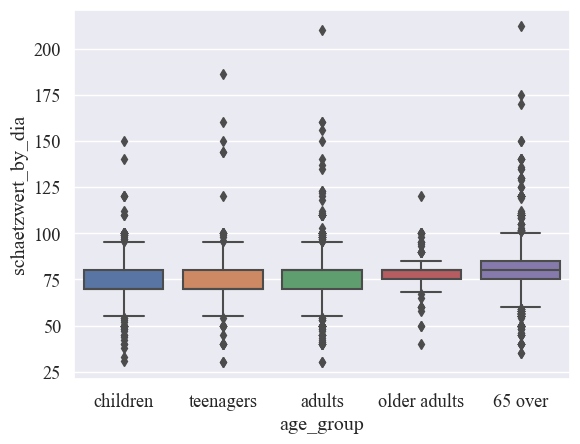

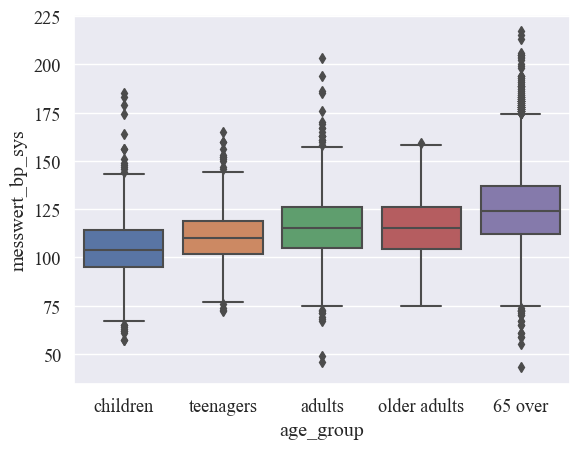

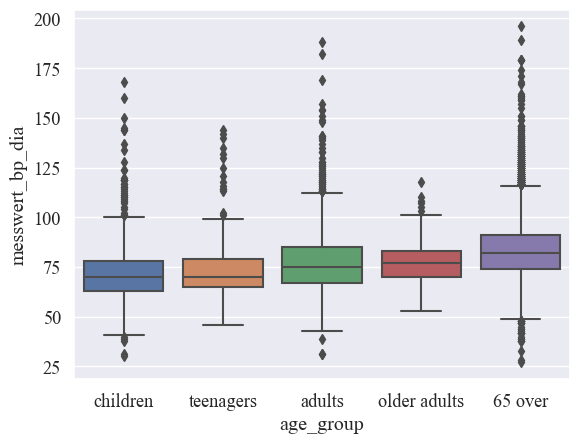

In [18]:
for col in colNames:
    plt.figure()
    sns.boxplot(data=data_df,x="age_group",y=col)

In [ ]:
#Box plots with respect to Gender

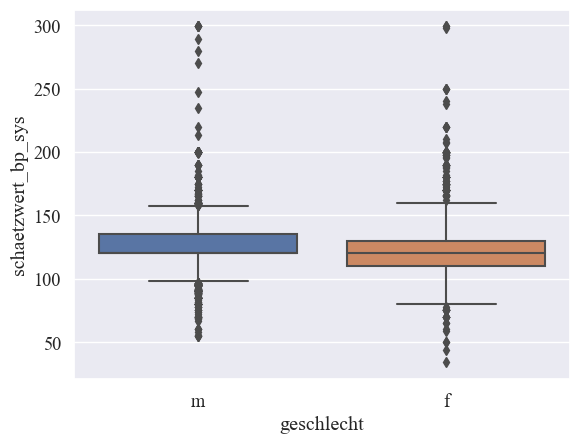

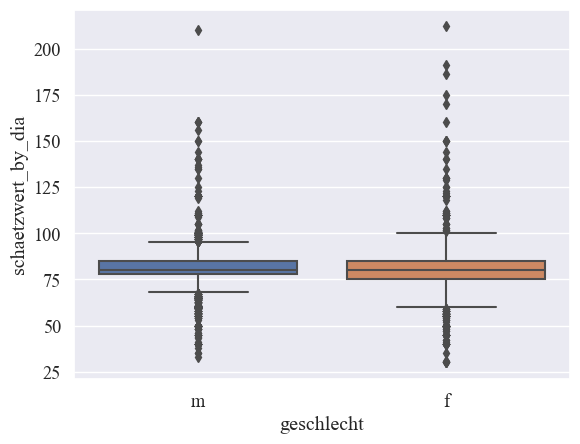

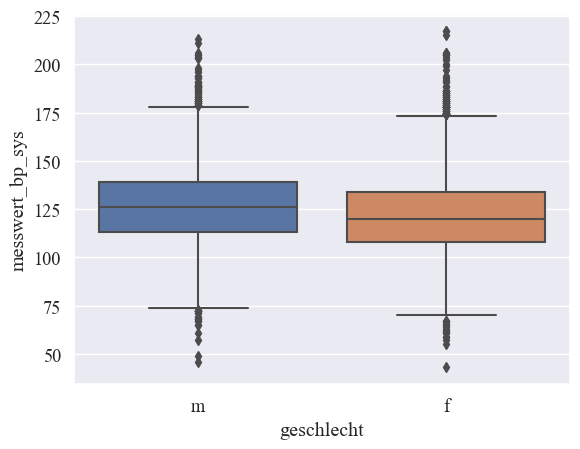

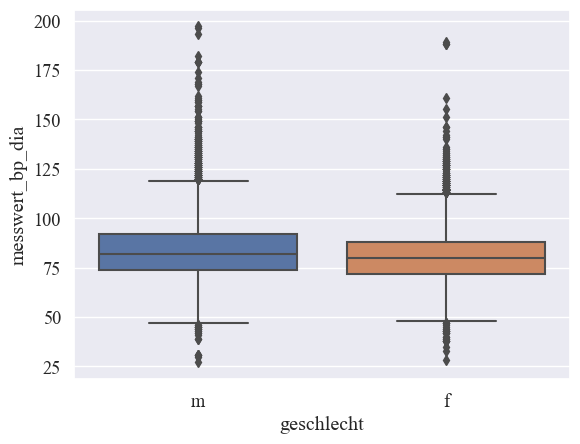

In [20]:
for col in colNames:
    plt.figure()
    sns.boxplot(data=data_df,x="geschlecht",y=col)